In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\Rupam\\animaldata'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir +'\\test\\'
train_path = data_dir + '\\train\\'

In [7]:
os.listdir(train_path)

['cats', 'dogs']

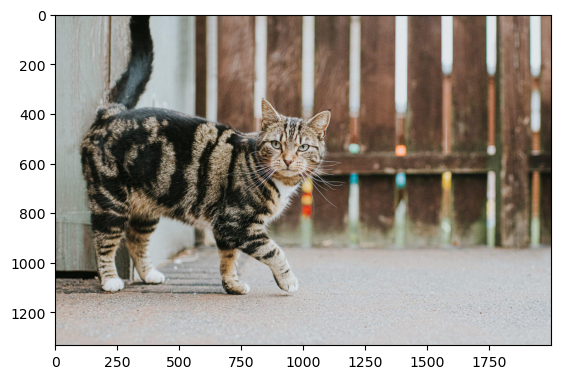

In [8]:
plt.imshow(imread(train_path + 'cats\\' + os.listdir(train_path+'cats')[0]))

In [9]:
len(os.listdir(train_path+ 'dogs'))

278

In [10]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'cats'):
    img = imread(test_path+ 'cats\\'+ image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

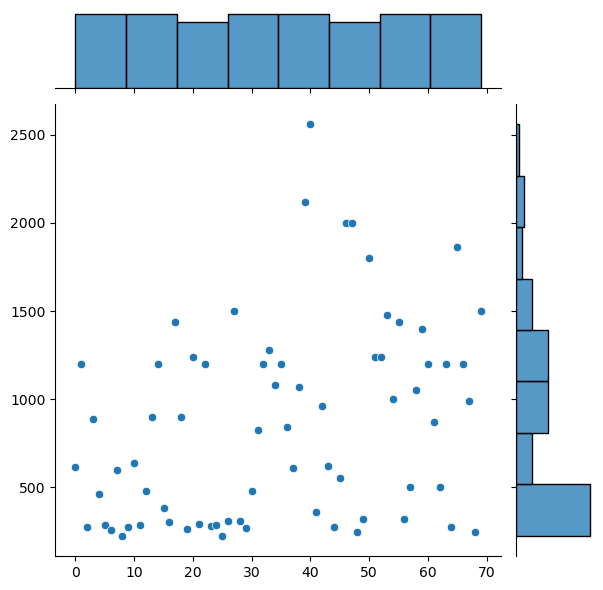

In [11]:
sns.jointplot(dim2)

In [12]:
dim1

[769,
 720,
 183,
 590,
 495,
 178,
 195,
 338,
 225,
 183,
 443,
 177,
 320,
 506,
 900,
 384,
 168,
 560,
 750,
 193,
 649,
 174,
 1200,
 181,
 177,
 225,
 162,
 1000,
 163,
 187,
 480,
 549,
 1200,
 720,
 720,
 801,
 360,
 408,
 1600,
 1414,
 1999,
 202,
 540,
 413,
 183,
 367,
 850,
 640,
 204,
 158,
 1200,
 698,
 649,
 950,
 500,
 754,
 240,
 520,
 549,
 1400,
 627,
 400,
 281,
 667,
 183,
 2965,
 667,
 350,
 203,
 1000]

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
image_shape = (600, 1500, 3)


In [15]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [16]:
image_gen = ImageDataGenerator(rotation_range = 5,
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              rescale = 1/255,
                              shear_range = 0.1,
                              zoom_range = 0.1,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

In [17]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Dropout,Flatten

In [33]:
model = Sequential()


In [34]:
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))



model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [37]:
batch_size = 16

In [38]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size = image_shape[:2], color_mode = 'rgb', 
                                                batch_size = batch_size, class_mode = 'binary' )

Found 557 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size = image_shape[:2], color_mode = 'rgb', 
                                                batch_size = batch_size, class_mode = 'binary' )

Found 140 images belonging to 2 classes.


In [40]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [1]:
results = model.fit_generator(train_image_gen, epochs = 20, validation_data = test_image_gen, callbacks = [early_stop])

NameError: name 'model' is not defined

In [42]:
model.evaluate_generator(test_image_gen)

C:\Users\rupam\AppData\Local\Temp\ipykernel_24944\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.693040132522583, 0.48571428656578064]

In [2]:
import os
os.getcwd()

'C:\\Users\\rupam'